In [14]:
from openslide import OpenSlide
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import cv2

In [15]:
impath = r"\\10.99.68.54\Digital pathology image lib\Alopecia_joel_sunshine\AA001\H\BI4N7189_708.tif"

In [16]:
image = OpenSlide(impath)

In [38]:
pxsz = image.properties['openslide.mpp-x']
pxsz

'0.46500000000000002'

In [17]:
dims = image.level_dimensions
dims

((24784, 36224),
 (12392, 18112),
 (6200, 9056),
 (3104, 4528),
 (1552, 2264),
 (776, 1136),
 (392, 568),
 (200, 288),
 (104, 144))

In [18]:
target_level = 3

In [19]:
dsf = dims[0][0]/dims[target_level][0]
dsf

7.984536082474227

In [20]:
imobj = image.read_region(location=(0,0), level=target_level, size=dims[target_level])

In [21]:
I0=255
imobj = np.array(imobj)
intensity = np.mean(imobj, axis=2)
intensity[intensity == 0] = 1e-10
OD = -np.log10(intensity / I0)

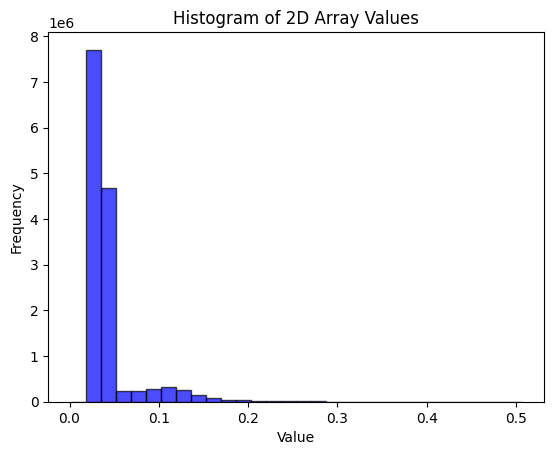

In [22]:
flat_data = OD.flatten()
plt.hist(flat_data, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of 2D Array Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [23]:
threshold = 0.05
OD_binary = (OD >= threshold).astype(np.uint8)

In [24]:
OD_binary_closed = cv2.morphologyEx(OD_binary, cv2.MORPH_CLOSE, kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30)))

In [25]:
OD_open = cv2.morphologyEx(OD_binary_closed, cv2.MORPH_OPEN, kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(100,100)))

In [26]:
tissue_area = np.sum(OD_open)
tissue_area

2263717

In [27]:
num_labels, labels_im = cv2.connectedComponents(OD_open)
num_labels

5

In [31]:
areas = []
for i in range(num_labels):
    areas.append(np.sum(labels_im==i))

In [32]:
areas

[11791195, 618444, 506214, 630677, 508382]